In [74]:
import string
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [23]:
# Note - I removed nonbinary lines and the last empty line in the pop2.txt file
data1 = open("./pop2.txt")
data = [lineSplit(line) for line in data1.read().splitlines()]
data_np = np.array(data)
#dataTransposed = [[] for col in data[0]]
#for i in range(len(data)):
#    for j in range(len(data[0])):
#        dataTransposed[j].append(int(data[i][j]))

In [77]:
def lineSplit(line):
    retList = []
    for c in line:
        retList.append(int(c))
        
    return retList

def LD(col1, col2):
    P0_ = 0
    P_0 = 0
    P00 = 0
    P11 = 0            
    N = len(col1)
    for i in range(N):
        if col1[i] == 0:
            P0_ += 1
            if col2[i] == 0:
                P00 += 1
                P_0 += 1
        else:
            if col2[i] == 1:
                P11 += 1
            else:
                P_0 += 1
    P0_ = float(P0_) / N
    P_0 = float(P_0) / N
    P00 = float(P00) / N
    P11 = float(P11) / N
    P1_ = 1 - P0_
    P_1 = 1 - P_0
    D = P00 - P0_*P_0
    D_max = 0
    if(D >= 0):
        D_max = min(P0_*P_1,P1_*P_0)
    else:
        D_max = min(P0_*P_0, P1_*P_1)
    D_prime = float(abs(D) / D_max)
    numer = pow(D, 2) * N
    chi2 = (numer / (P0_ * P_0)) + (numer / (P0_ * P_1)) + (numer / (P1_ * P_0)) + (numer / (P1_ * P_1))
    chi2 = stats.chi2.sf(chi2, 1)
    
    return (D_prime, chi2)
    #return D

In [78]:
LD_mat_D = np.zeros((data_np.shape[1], data_np.shape[1]))
LD_mat_P = np.zeros((data_np.shape[1], data_np.shape[1]))
try:
    LD_mat_D = np.load("Problem1LD_D.npy")
    LD_mat_P = np.load("Problem1LD_P.npy")

except:
    for i in range(LD_mat.shape[0]):
        if i % 100 == 0:
            print(i)
        for j in range(LD_mat.shape[1]):
            LD_mat_D[i][j] = LD(data_np[:,i], data_np[:,j])[0]
            LD_mat_P[i][j] = LD(data_np[:,i], data_np[:,j])[1]

            
    np.save("Problem1LD_D", LD_mat_D)
    np.save("Problem1LD_P", LD_mat_P)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


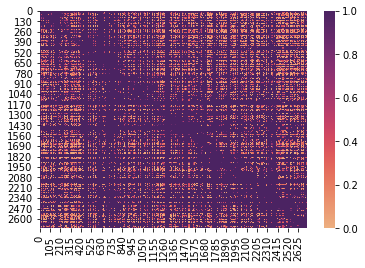

In [60]:
ax1 = sns.heatmap(LD_mat_D, cmap="flare")

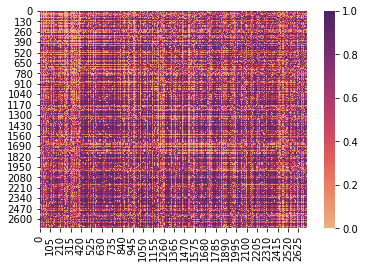

In [79]:
ax2 = sns.heatmap(LD_mat_P, cmap="flare")